In [1]:
library(dplyr)      |> suppressPackageStartupMessages()
library(readr)      |> suppressPackageStartupMessages()
library(bnlearn)    |> suppressPackageStartupMessages()
library(bnstruct)   |> suppressPackageStartupMessages()
library(Rgraphviz)  |> suppressPackageStartupMessages()
library(foreach)    |> suppressPackageStartupMessages()
library(doParallel) |> suppressPackageStartupMessages()
library(ggplot2)    |> suppressPackageStartupMessages()
library(tidyr)      |> suppressPackageStartupMessages()
library(purrr)      |> suppressPackageStartupMessages()

source("InternalLibrary/R/K2algo.R")
source("InternalLibrary/R/utils.R")

## Datasets and DAGs

### Ruiz dataset

In [2]:
records <- c(1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0)
ruiz_example  <- data.frame(matrix(records, 10,3, byrow=TRUE))

ruiz_example

X1,X2,X3
<dbl>,<dbl>,<dbl>
1,0,0
1,1,1
0,0,1
1,1,1
0,0,0
0,1,1
1,1,1
0,0,0
1,1,1


In [3]:
print(scoring_function(ruiz_example, "X3", c()))
print(log_scoring_function(ruiz_example, "X3", c()))

[1] 0.0004329004
[1] -7.745003


In [4]:
res <- K2_pipeline(ruiz_example, max_parents=3, max_iter=1)
print(paste("Score: ", res$score))

[1] "Score:  -23.3137121136653"


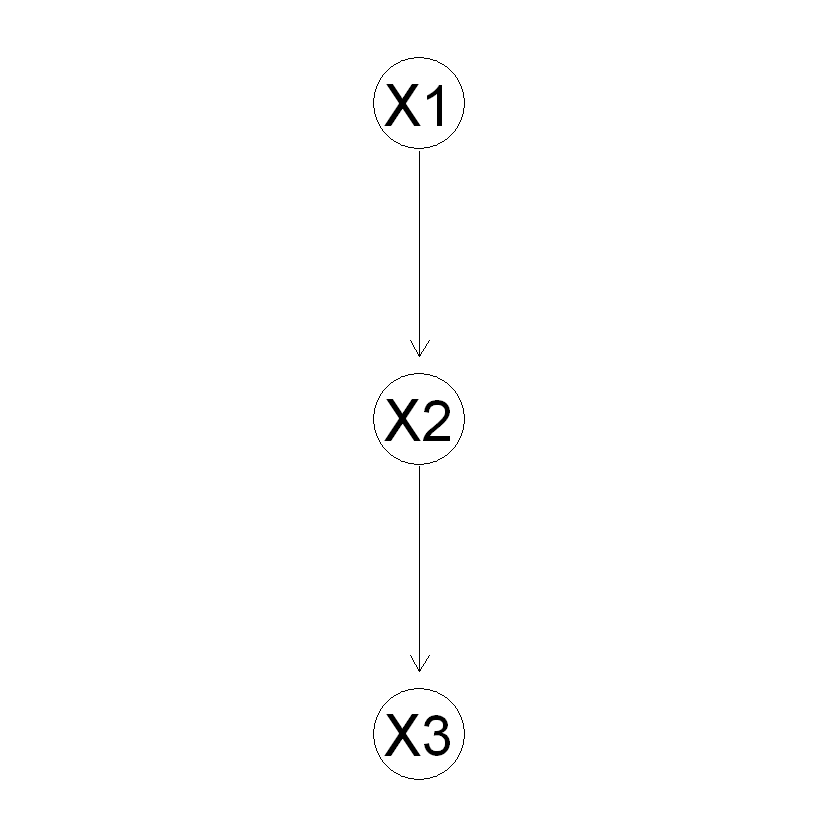

In [5]:
dag <- res$dag
graphviz.plot(dag, shape="circle")

### Child dataset

In [6]:
# Load the data
child_df <- child() |> # S4 object
  impute() |> # Impute the dataset to remove missing values
  imputed.data() |> # Extract the imputed dataset
  as.data.frame() # Convert to a data frame

# Set the column names
colnames(child_df) <- child()@variables
print(colnames(child_df))

head(child_df)

bnstruct :: performing imputation ...

bnstruct :: imputation finished.



 [1] "BirthAsphyxia"  "Disease"        "Age"            "LVH"           
 [5] "DuctFlow"       "CardiacMixing"  "LungParench"    "LungFlow"      
 [9] "Sick"           "HypDistrib"     "HypoxiaInO2"    "CO2"           
[13] "ChestXray"      "Grunting"       "LVHReport"      "LowerBodyO2"   
[17] "RUQO2"          "CO2Report"      "XrayReport"     "GruntingReport"


,BirthAsphyxia,Disease,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHReport,LowerBodyO2,RUQO2,CO2Report,XrayReport,GruntingReport
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,3,3,2,1,3,1,1,2,1,1,1,1,2,2,2,3,2,1,2
2,2,4,2,1,1,2,1,2,2,1,2,1,2,2,1,2,2,1,2,2
3,2,3,1,2,1,3,1,2,2,1,2,2,2,2,2,1,2,1,2,2
4,2,4,1,1,1,3,1,1,2,1,3,1,1,2,1,3,1,1,1,2
5,2,2,1,2,2,4,1,1,1,1,3,1,1,2,2,1,1,1,2,2
6,2,2,1,2,1,4,1,3,2,1,3,1,3,2,2,2,1,1,3,2


In [7]:
#res <- K2_to_dag(child_df, max_parents=3)
res <- K2_pipeline(child_df, max_parents=3, max_iter=3)
print(paste("Score: ", res$score))

[1] "Score:  -79636.3597108962"


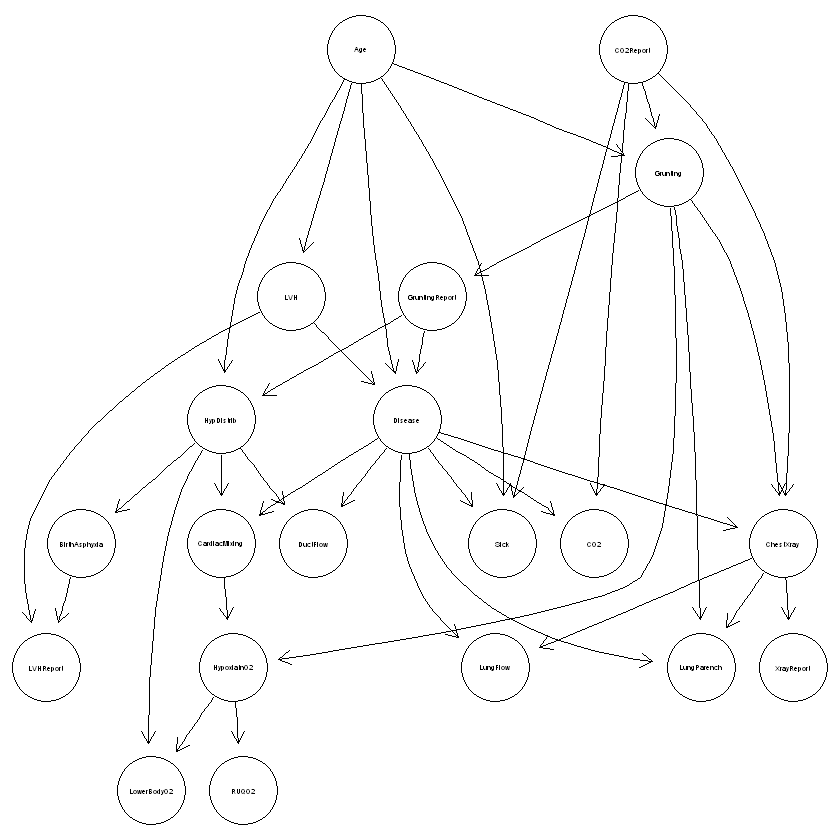

In [8]:
dag <- res$dag
graphviz.plot(dag, shape="circle")

### Asia dataset

In [9]:
asia_df <- asia() |> # S4 object
  impute() |> # Impute the dataset to remove missing values
  imputed.data() |> # Extract the imputed dataset
  as.data.frame() # Convert to a data frame

# Set the column names
colnames(asia_df) <- asia()@variables
print(colnames(asia_df))

head(asia_df)

bnstruct :: performing imputation ...

bnstruct :: imputation finished.



[1] "Asia"         "Tubercolosys" "Smoke"        "LungCancer"   "Bronchitis"  
[6] "Either"       "X-ray"        "Dyspnea"     


,Asia,Tubercolosys,Smoke,LungCancer,Bronchitis,Either,X-ray,Dyspnea
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,2,1,1,1,2,1,2
2,2,1,1,1,1,1,2,1
3,1,1,2,1,1,1,2,1
4,2,1,2,1,1,1,2,1
5,2,1,2,1,1,1,1,2
6,2,1,2,1,1,1,2,2


In [10]:
#res <- K2_to_dag(asia_df, max_parents=3)
res <- K2_pipeline(asia_df, max_parents=3, max_iter=3)
print(paste("Score: ", res$score))

[1] "Score:  26679.2048334832"


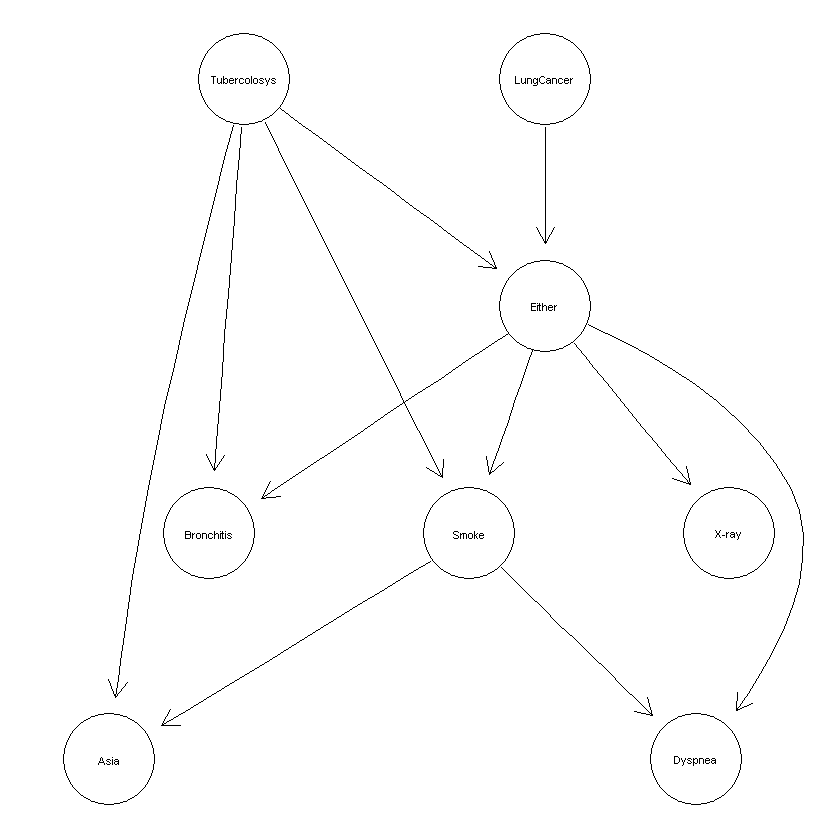

In [11]:
dag <- res$dag
graphviz.plot(dag, shape="circle")

### SACHS

In [12]:
sachs_df <- read_csv('https://www.ccd.pitt.edu/wiki/images/SACHS10k.csv', show_col_types = FALSE)
head(sachs_df)

`curl` package not installed, falling back to using `url()`


Akt,Erk,Jnk,Mek,P38,PIP2,PIP3,PKA,PKC,Plcg,Raf
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,1,2,2,3,1,1
1,2,1,1,2,1,2,2,2,1,1
1,1,3,1,3,2,2,1,1,3,3
1,2,1,1,1,1,3,3,1,1,2
1,2,1,1,1,1,3,2,2,2,1
1,2,2,2,1,1,1,2,2,1,2


In [13]:
#res <- K2_to_dag(sachs_df, max_parents=3)
res <- K2_pipeline(sachs_df, max_parents=3, max_iter=3)
print(paste("Score: ", res$score))

[1] "Score:  -95221.033871598"


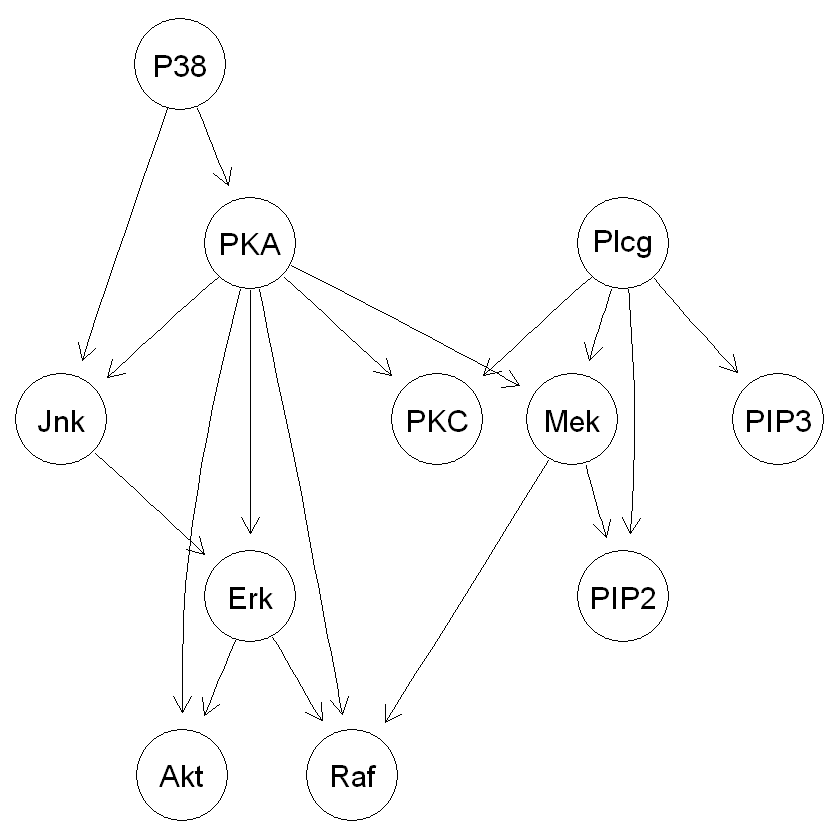

In [14]:
dag <- res$dag
graphviz.plot(dag, shape="circle")

## Comparisons and Analysis

In [15]:
datasets <- list(
  asia = asia_df,
  child = child_df,
  sachs = sachs_df
)

### Number of iterations

In [16]:
# Helper function to get the rescaled history from a dataset
get_rescaled_history <- function(data, iters){
  res <- K2_pipeline(data, max_parents=3, max_iter=iters, mode="local", return_history=TRUE)
  hist <- res$history
  if (min(hist) == max(hist)){
    hist <- array(data = 1, dim = c(iters))
  } else {
    hist <- (hist - min(hist)) / (max(hist) - min(hist))
  }
  return(hist)
}

: 

In [17]:
n_realizations <- 5

# Create the long-format data frame
results <- map2_df(
  names(datasets), datasets,
  ~ {
    # Loop over each realization
    map_df(1:n_realizations, function(realization_id) {
      # Generate the time series scores
      hist <- get_rescaled_history(.y, 15)
      
      # Create a data frame for the current realization
      data.frame(
        dataset_id = .x,               # The name of the current dataset
        realization_id = realization_id, # Current realization index
        time_point = seq_along(hist), # Iterations
        score = hist            # The scores for each time point
      )
    })
  }
)

# Save the data frame to an RDS file
saveRDS(results, file = "./temp_data/convergenceK2.rds")

In [15]:
# Load the data frame from the RDS file
results <- readRDS("./temp_data/convergenceK2.rds")

In [16]:
# Summarize the results
summary_stats <- results |>
  group_by(dataset_id, time_point) |>
  summarize(
    mean_score = mean(score),
    sd_score = sd(score),
    .groups = 'drop'
  )

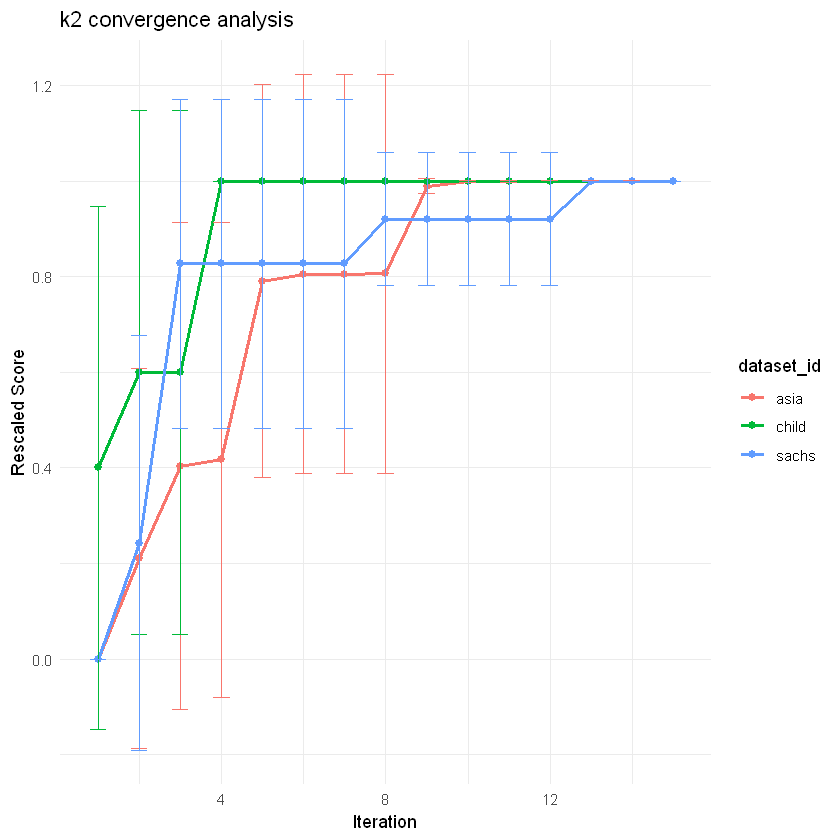

In [17]:
# Plot the analysis about the convergence
ggplot(summary_stats, aes(x = time_point, y = mean_score, color = dataset_id)) +
  geom_line(linewidth = 1) +  # Line plot
  geom_point(size = 2) +  # Points
  geom_errorbar(aes(ymin = mean_score - sd_score, ymax = mean_score + sd_score), 
                width = 0.4) +  # Error bars
  labs(title = "k2 convergence analysis",
       x = "Iteration",
       y = "Rescaled Score") +
  theme_minimal()


### Number of parents

In [ ]:
n_realizations <- 5

# Create the long-format data frame
results <- map2_df(
  names(datasets), datasets,
  ~ {
    # Loop over each realization
    map_df(1:n_realizations, function(realization_id) {

      map_df(1:5, function(max_parents) {
        # Generate the scores
        res <- K2_pipeline(.y, max_parents=max_parents, 
                           max_iter=10, mode="local")
        score <- res$score
        
        # Create a data frame for the current realization
        data.frame(
          dataset_id = .x,               # The name of the current dataset
          realization_id = realization_id, # Current realization index
          score = score,            # The scores for each time point
          max_parents = max_parents # The maximum number of parents
        )
      })

    })
  }
)

# Save the data frame to an RDS file
saveRDS(results, file = "./temp_data/parentsK2.rds")

In [18]:
# Load the data frame from the RDS file
results <- readRDS("./temp_data/parentsK2.rds")

In [19]:
# Summarize the results
summary_stats <- results |>
  group_by(dataset_id, max_parents) |>
  summarize(
    mean_score = mean(score),
    sd_score = sd(score),
    .groups = 'drop'
  )

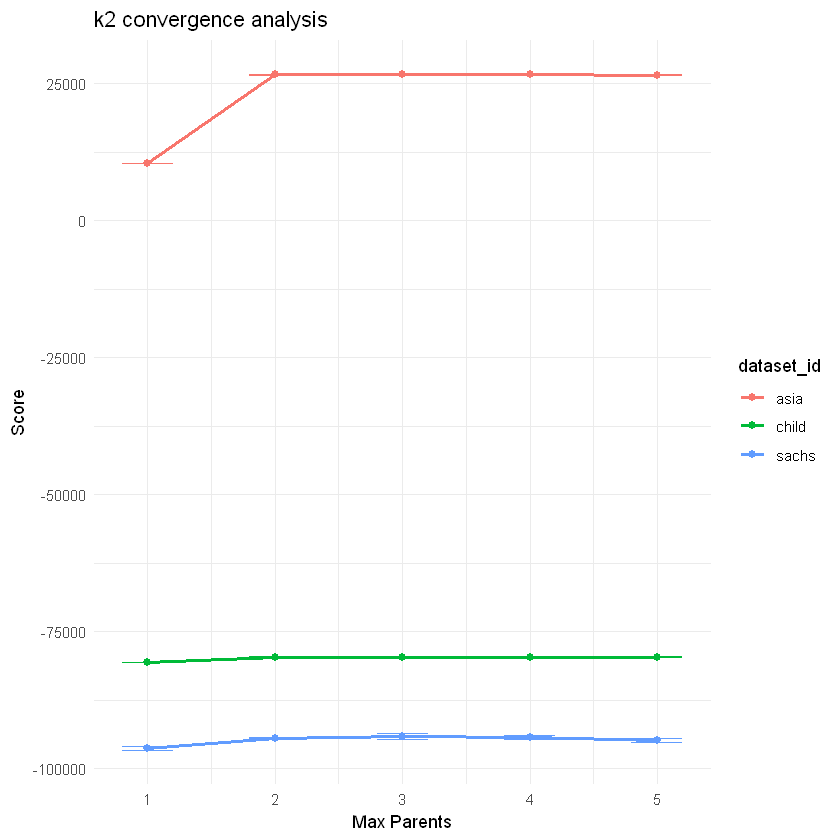

In [20]:
# Plot the analysis about the convergence
ggplot(summary_stats, aes(x = max_parents, y = mean_score, color = dataset_id)) +
  geom_line(linewidth = 1) +  # Line plot
  geom_point(size = 2) +  # Points
  geom_errorbar(aes(ymin = mean_score - sd_score, ymax = mean_score + sd_score), 
                width = 0.4) +  # Error bars
  labs(title = "k2 convergence analysis",
       x = "Max Parents",
       y = "Score") +
  theme_minimal()


## BNSTRUCT IMPLEMENTATION

We show the results with using bnstruct to compute the best dag using as example the Child Data set

In [21]:
# Define a vector of algorithms to be used for learning the DAGs
algorithms <- c("hc", "sm", "mmpc", "mmhc", "sem")

# Initialize empty lists to store the DAGs and their scores
dag_listChild <- list()
score_listChild <- list()

# Loop through each algorithm in the algorithms vector
for (algo in algorithms) {
  # Learn the DAG using the specified algorithm and parameters
  dagChild <- learning(child_df, maxParent=5, algo = algo, percentage = 1, plot = F)
  
  # Store the learned DAG in the dag_listAsia list, using the algorithm name as the key
  dag_listChild[[algo]] <- dagChild$dag
  
  # Store the score of the learned DAG in the score_listAsia list, using the algorithm name as the key
  score_listChild[[algo]] <- dagChild$score
}

bnstruct :: HC uses 'max.fanin' and 'layer.struct' parameters, but apparently you set 'max.parents' and 'max.parents.layers', changing accordingly.

bnstruct :: learning the structure using HC ...

bnstruct :: learning using HC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: MMPC uses 'max.fanin', but apparently you set 'max.parents', changing accordingly.

bnstruct :: learning the structure using MMPC ...

bnstruct :: learning using MMPC completed.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using SEM ...

... bnstruct :: no missing values found, learning the network once

... bnstruct 

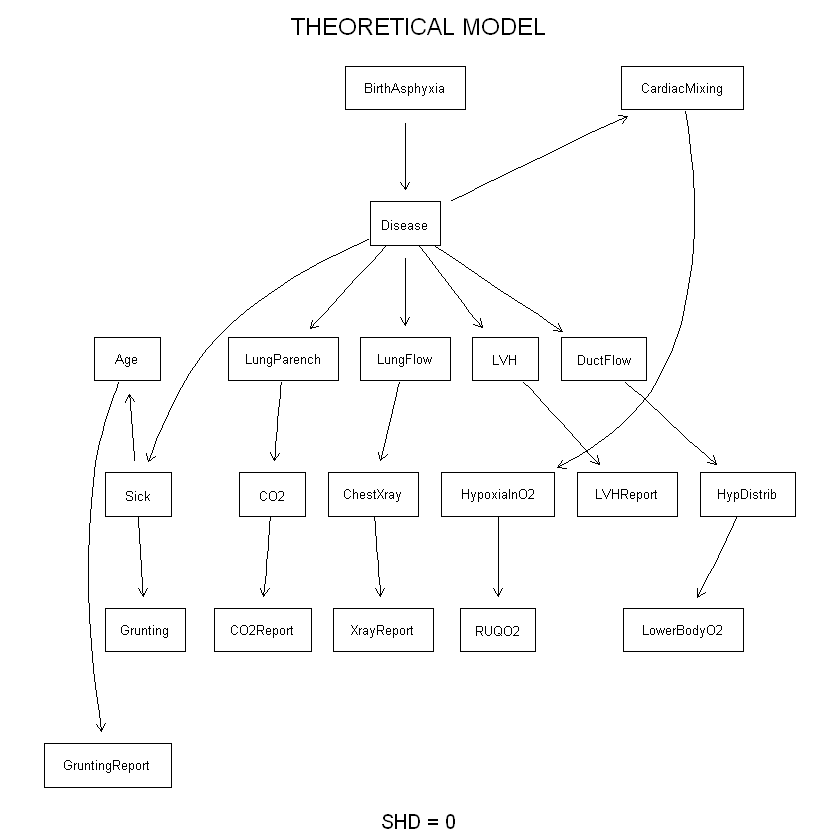

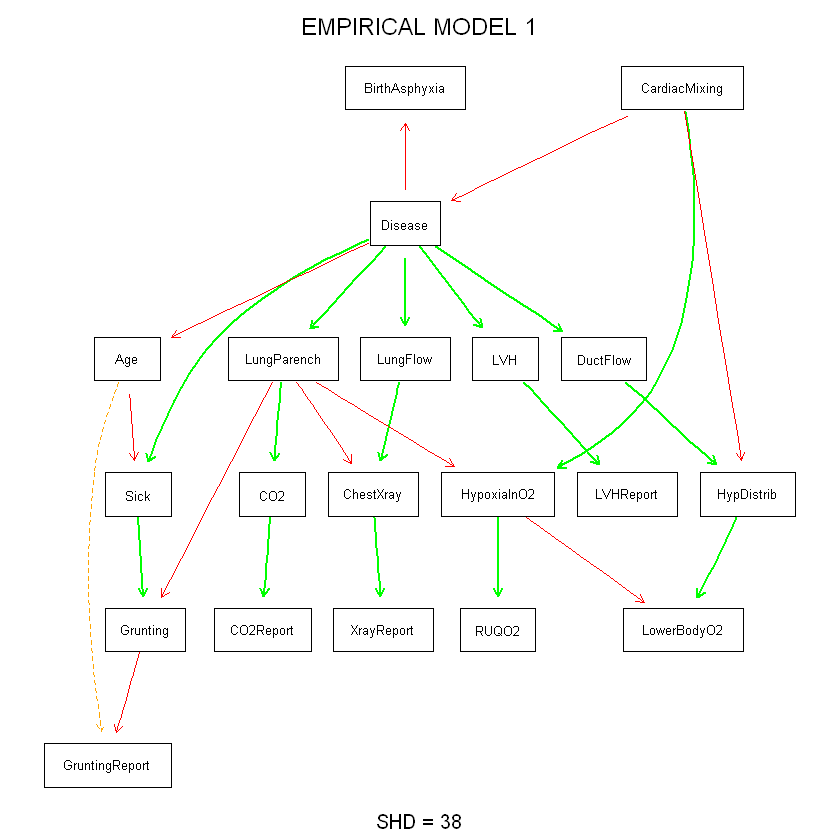

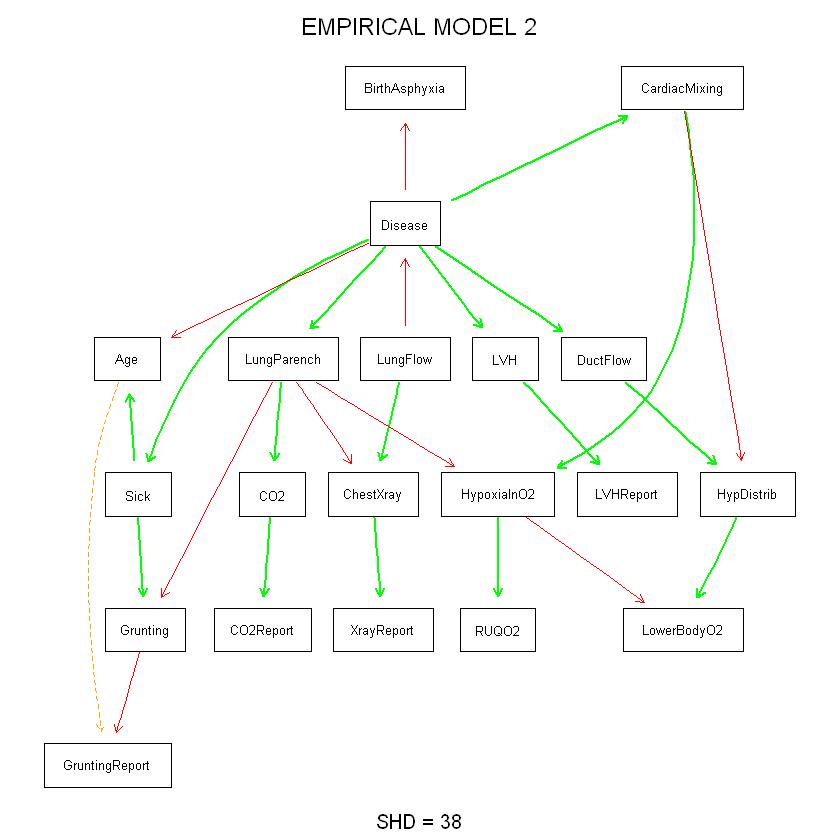

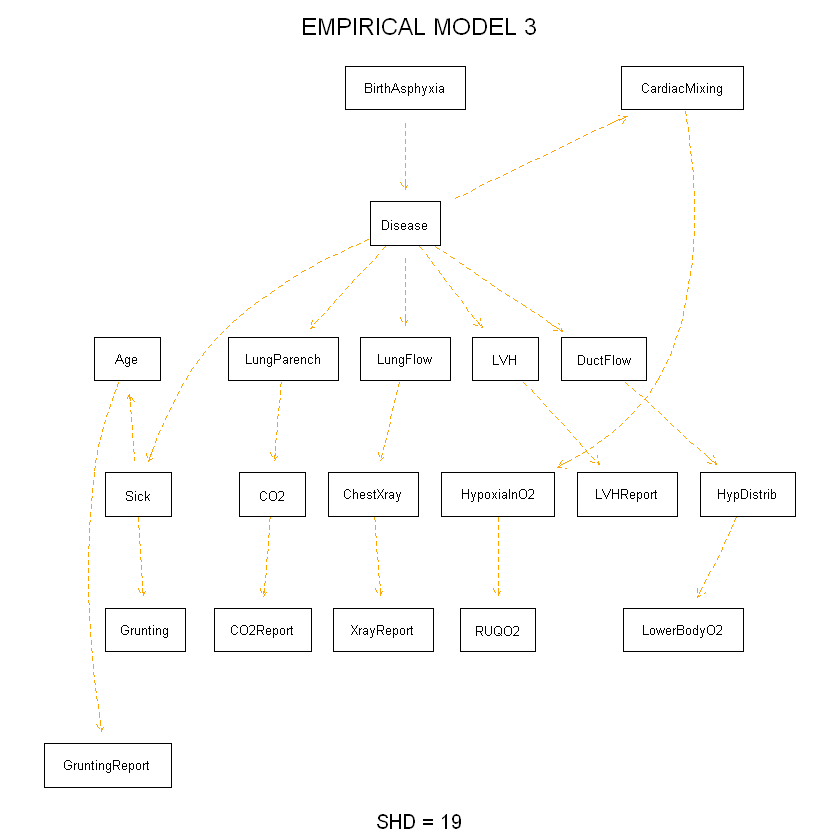

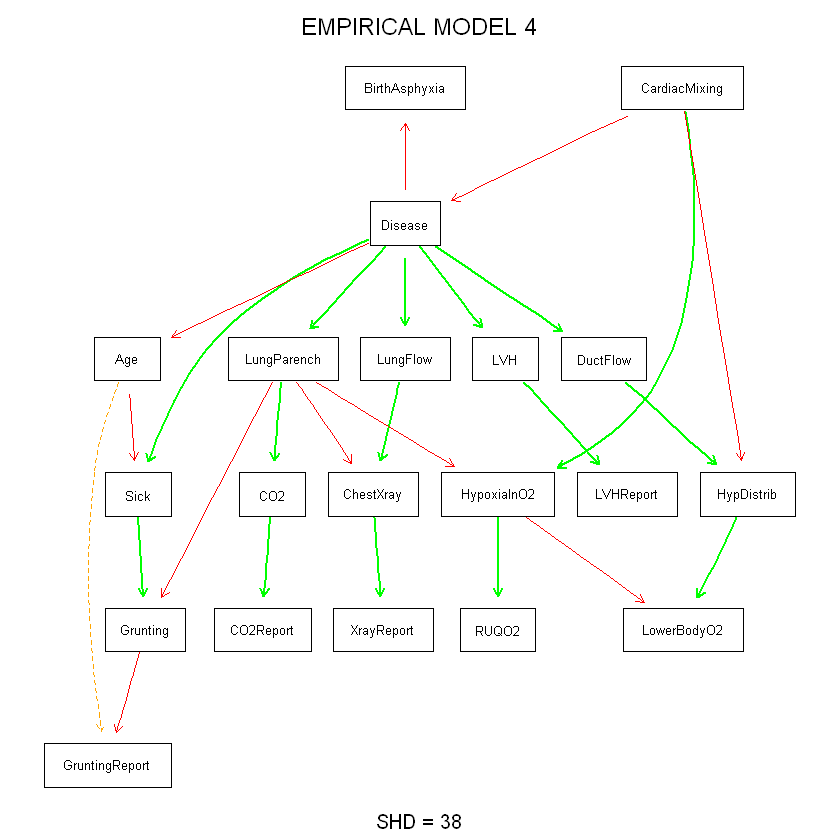

hc   sm mmpc mmhc  sem 
  38   38   19   38   38

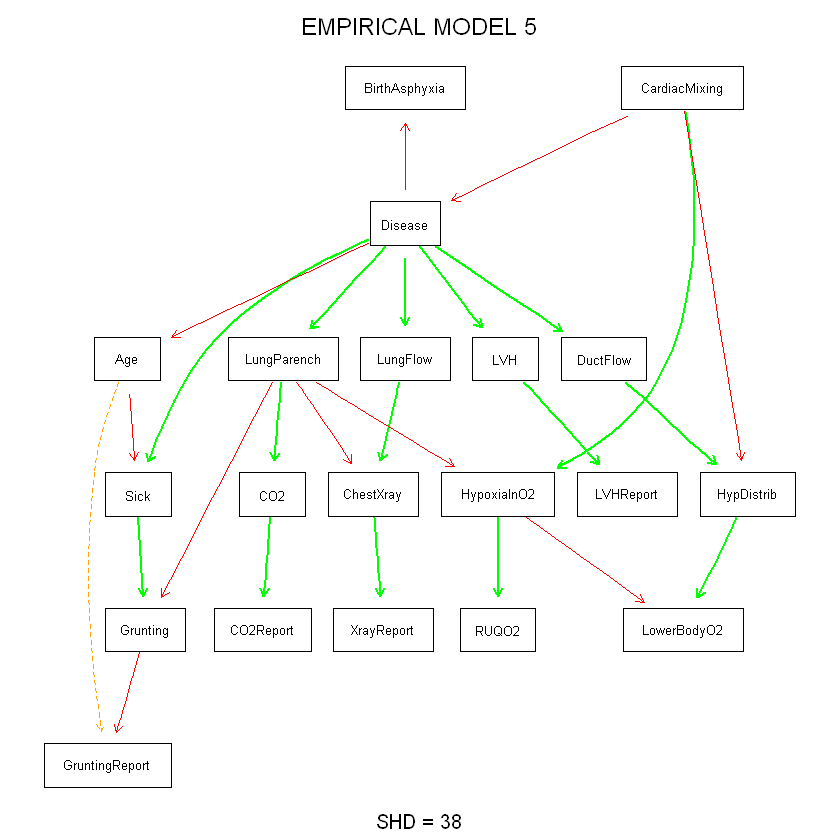

In [22]:
# Define the theoretical DAG using the model2network function
theorDAG <- model2network("[BirthAsphyxia][Disease|BirthAsphyxia][Sick|Disease][DuctFlow|Disease][CardiacMixing|Disease][LungParench|Disease][LungFlow|Disease][LVH|Disease][Age|Sick][Grunting|Sick][HypDistrib|DuctFlow][HypoxiaInO2|CardiacMixing][CO2|LungParench][ChestXray|LungFlow][LVHReport|LVH][GruntingReport|Age][LowerBodyO2|HypDistrib][RUQO2|HypoxiaInO2][CO2Report|CO2][XrayReport|ChestXray]")

# Assign the list of learned DAGs to a variable
listChild <- dag_listChild

# Compute the Structural Hamming Distance (SHD) between the theoretical DAG and the list of learned DAGs
# Also, plot the comparison between the theoretical DAG and each learned DAG
computeShd(theorDAG, dag_listChild, plot = T)
theorDAG_child <- theorDAG

These plots show the the DAG, the colors indicate the differences between the theoretical one from Bnlearn and the empirical one obtain with the algorithm.
The different plots show different algorithms. It is also showed the shd, an index of how many differences are between two DAG

## COMPARING OF DIFFERENT METHODS AND  CONDITIONAL PROBABILITY

In [26]:
res_child <- K2_pipeline(child_df, max_parents = 3, max_iter = 3)
dag.child.k2 <- res_child$dag

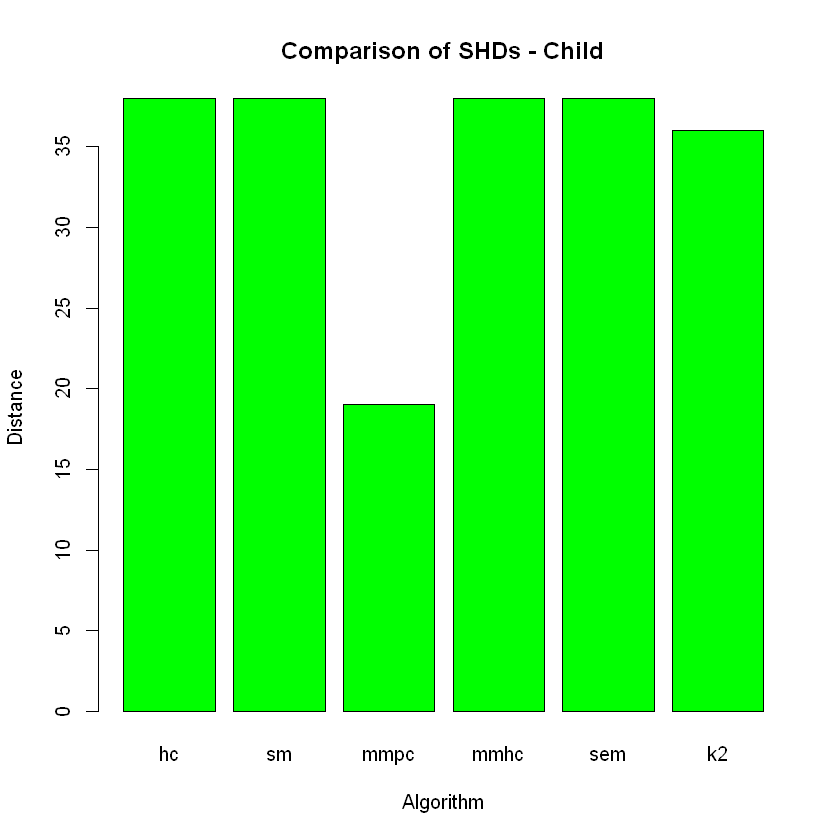

In [33]:
# shd plot
theorDAG <- theorDAG_child
computed <- lapply(dag_listChild, function(dag) computeShdSingle(theor = theorDAG, empir = dag))
computed$k2 <- computeShdSingle(theor = theorDAG, empir = dag.child.k2)
# Create a bar chart of the computed scores
barplot(unlist(computed), names.arg = names(computed), xlab = "Algorithm", ylab = "Distance", main = "Comparison of SHDs - Child", col = "green")

In [35]:
df <- data.frame(apply(child_df, c(1, 2), as.character), stringsAsFactors = TRUE)

bn_bayes$th <- bn.fit(theorDAG, df, method = "bayes", iss = 10)
bn_bayes$k2 <- bn.fit(theorDAG, df, method = "bayes", iss = 10)
bn_bayes <- lapply(listChild, function(child) bn.fit(child, df, method = "bayes", iss = 10))
lapply(bn_bayes, function(bayes) bn.fit.barchart(bayes$CO2, "CO2"))

ERROR: Error: oggetto 'bn_bayes' non trovato
